In [1]:
import coreapi
import os
from quantuminspire.api import QuantumInspireAPI
from coreapi.auth import BasicAuthentication
from quantuminspire.credentials import get_token_authentication



 
# Note: BasicAuthentication is not recommended, use the API token instead
server = r'https://api.quantum-inspire.com'
email='thijs.hartmann@hotmail.nl'

password=os.environ.get("password")

auth = get_token_authentication()

authentication = BasicAuthentication(email, password)
qi = QuantumInspireAPI(server, authentication, 'python_1')



In [3]:
# auth = coreapi.auth.BasicAuthentication(username=email, password=password)
 
# # Initialize a client & load the schema document
# client = coreapi.Client(auth=auth)
# schema = client.get(f'{server}/schema')
 
# # Interact with the API endpoint
# action = ["projects", "list"]
# result = client.action(schema, action)


# from quantuminspire.qiskit import QI
# Replace 'your_api_token_here' with your actual API token
# QI.set_authentication("KEY_HERE")


In [2]:
nr_qubits = 4


In [2]:
qasm = f'''version 1.0

qubits {nr_qubits}
# start writing your code here
prep_z q[0] #state initialization in the z-basis in the |0> state
prep_z q[1] #state initialization in the z-basis in the |0> state
prep_z q[2] #state initialization in the z-basis in the |0> state

H q[0] #execute Hadamard gate on qubit 0
CNOT q[0],q[1] # CNOT gate between qubits 0 and 1
CNOT q[0],q[2]

Measure_x q[0] # Measurement on qubit 0 in the z-basis
Measure_y q[1]
Measure_z q[2]

display # write the current quantum state to the output file
'''

backend_type = qi.get_backend_type_by_name('QX single-node simulator')
result = qi.execute_qasm(qasm, backend_type=backend_type, number_of_shots=64)

if result.get('histogram', {}):
    print(result['histogram'])
else:
    reason = result.get('raw_text', 'No reason in result structure.')
    print(f'Result structure does not contain proper histogram data. {reason}')


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


[OrderedDict([('4', 0.0625), ('1', 0.15625), ('2', 0.140625), ('0', 0.171875), ('7', 0.125), ('3', 0.140625), ('5', 0.109375), ('6', 0.09375)])]


In [4]:
print(result['histogram'])

[OrderedDict([('0', 0.140625), ('6', 0.109375), ('1', 0.15625), ('7', 0.140625), ('5', 0.140625), ('3', 0.125), ('2', 0.0625), ('4', 0.125)])]


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


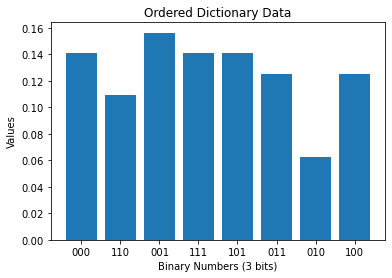

In [5]:
import matplotlib.pyplot as plt
from collections import OrderedDict

# Your data
data = result['histogram']

# Function to convert a number to a binary string with 3 bits
def to_binary_3bit(num):
    return format(num, '03b')

# Extract the keys (converted to binary) and values from the ordered dictionary
keys = [to_binary_3bit(int(key)) for key in data[0].keys()]
values = list(data[0].values())

# Create a bar plot
plt.bar(keys, values)
plt.xlabel('Binary Numbers (3 bits)')
plt.ylabel('Values')
plt.title('Ordered Dictionary Data')
plt.show()


In [23]:
nr_qubits = 6

backend_type = qi.get_backend_type_by_name('QX single-node simulator')


In [25]:
qasm = f'''version 1.0

qubits {nr_qubits}

# start writing your code here
prep_z q[0] #state initialization in the z-basis in the |0> state
prep_z q[1] #state initialization in the z-basis in the |0> state
prep_z q[2] #state initialization in the z-basis in the |0> state
prep_z q[3]
prep_z q[4]

H q[0] #execute Hadamard gate on qubit 0
CNOT q[0],q[1] # CNOT gate between qubits 0 and 1
CNOT q[0],q[2]
CNOT q[0],q[3]
CNOT q[0],q[4]




Measure_x q[0] # Measurement on qubit 0 in the z-basis
Measure_x q[1]
Measure_x q[2]
Measure_x q[3]
Measure_x q[4]

display # write the current quantum state to the output file
'''

result = qi.execute_qasm(qasm, backend_type=backend_type, number_of_shots=4096)

if result.get('histogram', {}):
    print("nice")
else:
    reason = result.get('raw_text', 'No reason in result structure.')
    print(f'Result structure does not contain proper histogram data. {reason}')


Your experiment can not be optimized and may take longer to execute, see https://www.quantum-inspire.com/kbase/optimization-of-simulations/ for details.


nice
